In [1]:
set.seed(10111)

In [2]:
x = matrix(rnorm(40), 20, 2)
y = rep(c(-1,1), c(10,10))

In [3]:
x[y==1, ]=x[y==1]+1

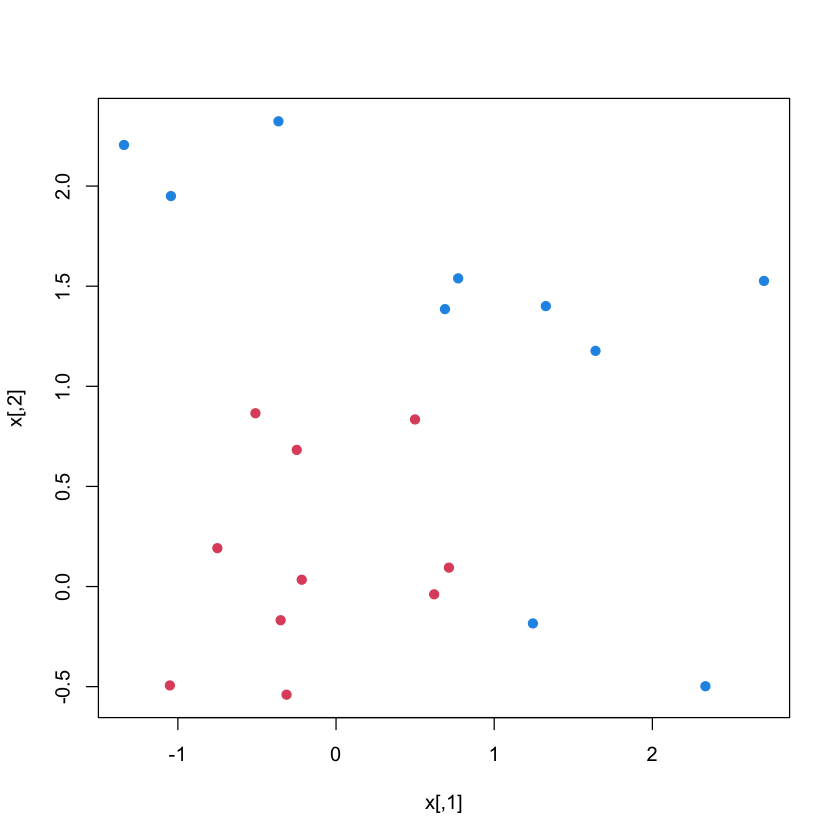

In [4]:
plot(x, col = y+3, pch = 19)

In [5]:
install.packages('e1071')


The downloaded binary packages are in
	/var/folders/jj/zsx33fbn3hzc62z4n024brl80000gn/T//RtmpE3xFH2/downloaded_packages


In [6]:
require(e1071)

Loading required package: e1071

Warning message:
“package ‘e1071’ was built under R version 4.0.1”


In [23]:
dat = data.frame(x, y=as.factor(y))

In [25]:
svmfit = svm(as.factor(y)~., data = dat, kernel = 'linear', cost = 10, scale = FALSE)

In [26]:
print(svmfit)


Call:
svm(formula = as.factor(y) ~ ., data = dat, kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6



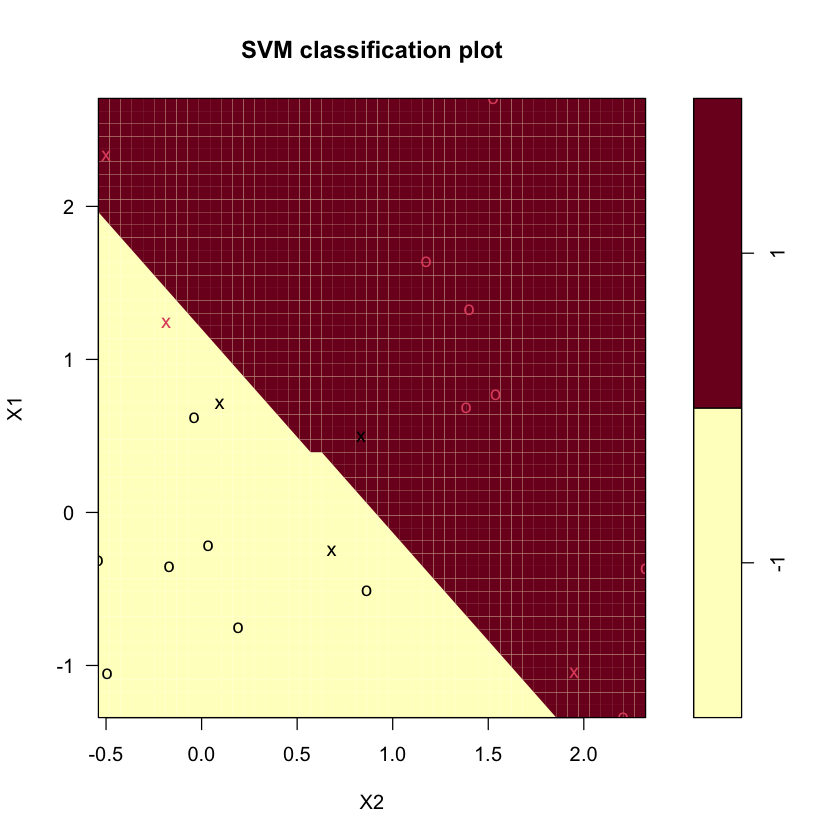

In [35]:
plot(svmfit, dat)

In [36]:
make.grid = function(x, n=75){
    grange=apply(x, 2, range)
    x1 = seq(from = grange[1,1], to = grange[2,1], length=n)
    x2 = seq(from = grange[1,2], to = grange[2,2], length=n)
    expand.grid(X1=x1, X2=x2)
    
}

In [37]:
xgrid = make.grid(x)
ygrid = predict(svmfit, xgrid)

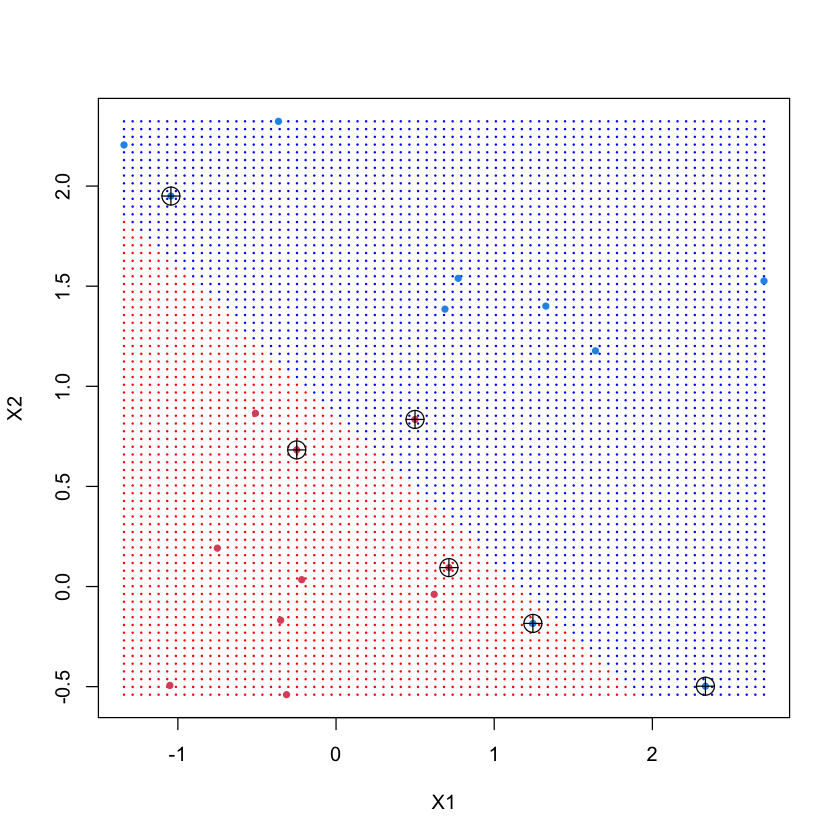

In [42]:
plot(xgrid, col = c('red', 'blue')[as.numeric(ygrid)], pch =20, cex=.2)
points(x, col=y+3, pch = 20)
points(x[svmfit$index,], pch = 10, cex = 2)

In [43]:
beta0 = svmfit$rho
beta = drop(t(svmfit$coefs)%*%x[svmfit$index,])

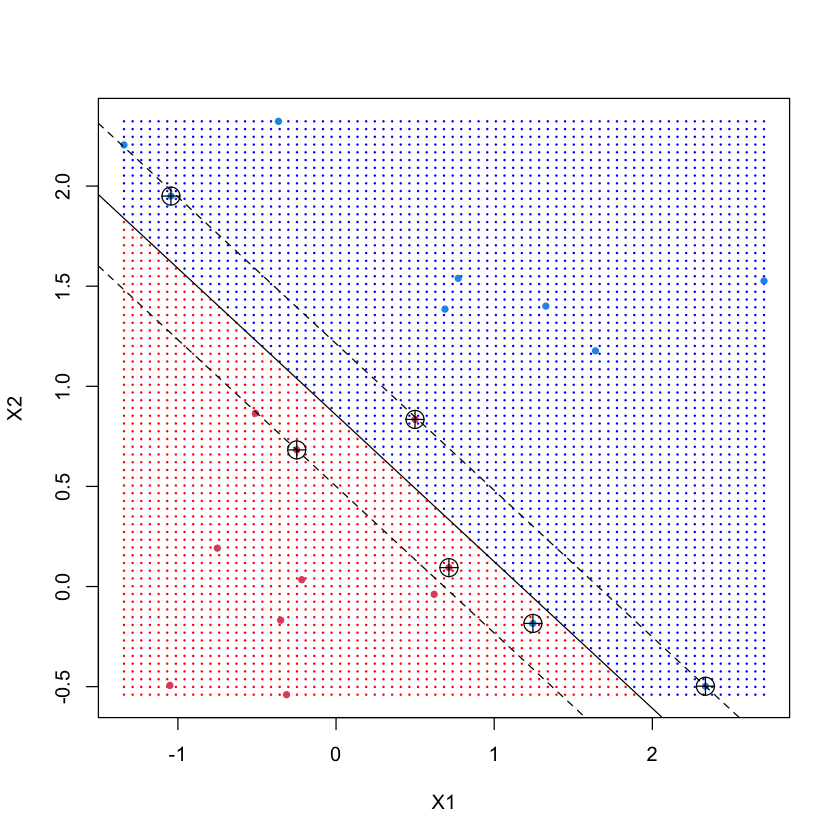

In [45]:
plot(xgrid, col = c('red', 'blue')[as.numeric(ygrid)], pch =20, cex=.2)
points(x, col=y+3, pch = 20)
points(x[svmfit$index,], pch = 10, cex = 2)
abline(beta0/beta[2], -beta[1]/beta[2])
abline((beta0-1)/beta[2], -beta[1]/beta[2], lty = 2)
abline((beta0+1)/beta[2], -beta[1]/beta[2], lty = 2)

cost parameter is selected through cross validation

#  Non Linear SVM

In [46]:
load(url("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda"))

In [47]:
names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

In [48]:
rm(x,y)

In [49]:
attach(ESL.mixture)

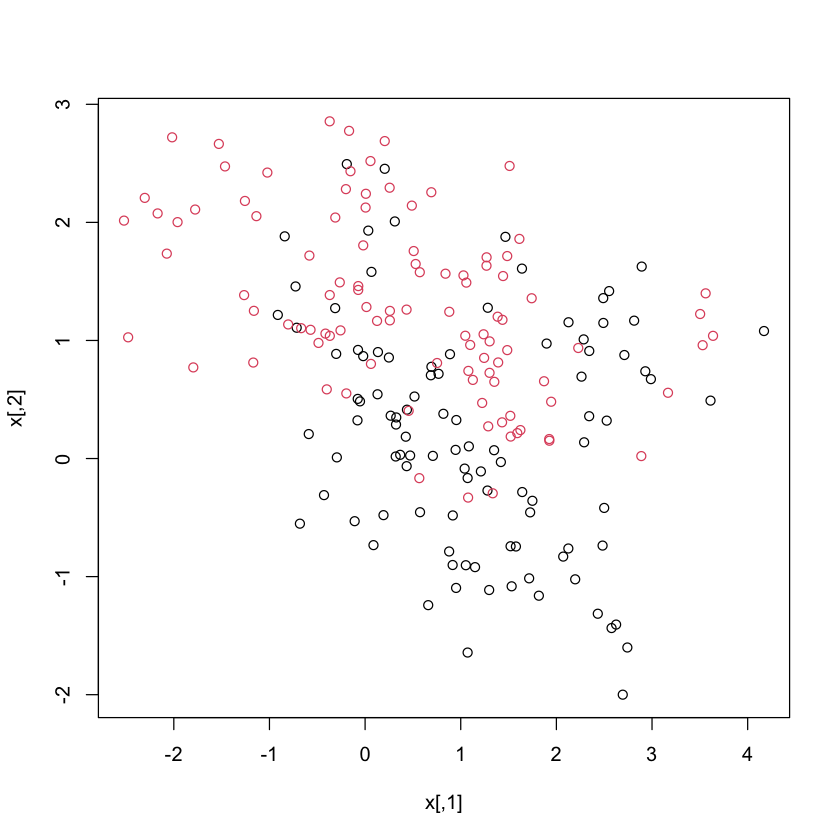

In [50]:
plot(x, col = y+1)

In [51]:
dat =data.frame(y = as.factor(y), x)

In [52]:
fit = svm(factor(y)~., data = dat, scale = FALSE, kernel = 'radial'
         , cost = 5)

In [53]:
xgrid = expand.grid(X1 = px1, X2=px2)
ygrid = predict(fit, xgrid)

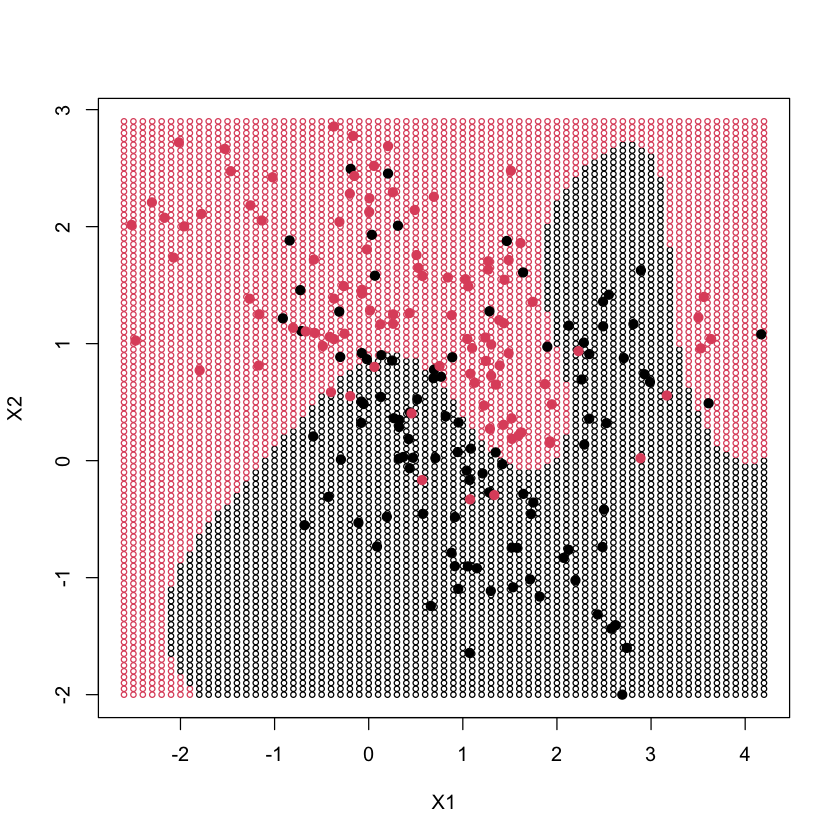

In [63]:
plot(xgrid, col = as.numeric(ygrid), pch = 21, cex = 0.6)
points(x, col= y+1, pch = 19)

In [64]:
func = predict(fit, xgrid, decision.values = TRUE)
func = attributes(func)$decision

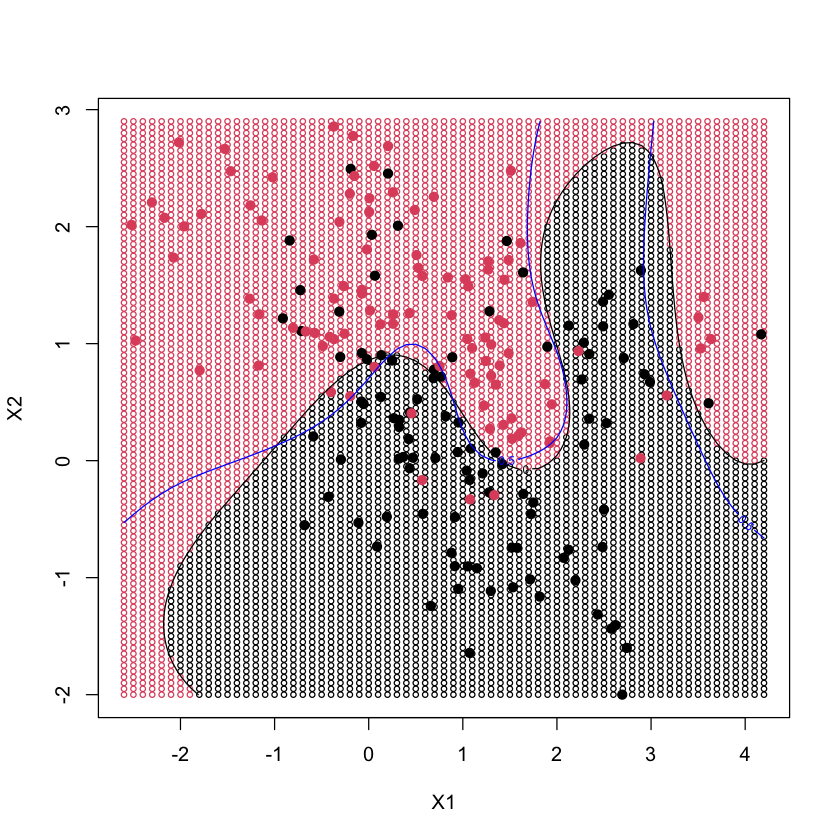

In [70]:
plot(xgrid, col = as.numeric(ygrid), pch = 21, cex = 0.6)
points(x, col= y+1, pch = 19)
contour(px1, px2, matrix(func, 69, 99), level = 0, add = TRUE)
contour(px1, px2, matrix(prob, 69, 99), level = 0.5, col = 'blue', add = TRUE)

In [ ]:
mvrnorm